In [41]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [43]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [44]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [45]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [46]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [47]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [48]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [49]:
x=Flatten()(resnet.output)

In [50]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [51]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [52]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [53]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [54]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [55]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [56]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3968\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 32s 21s/step - loss: 6.0236 - accuracy: 0.2812 - val_loss: 8.0469 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 24s 17s/step - loss: 7.3142 - accuracy: 0.2031 - val_loss: 2.3582 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 18s 13s/step - loss: 2.6240 - accuracy: 0.3906 - val_loss: 2.6498 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 20s 14s/step - loss: 1.5429 - accuracy: 0.4531 - val_loss: 2.4294 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 20s 14s/step - loss: 2.3109 - accuracy: 0.4688 - val_loss: 1.9433 - val_accuracy: 0.4655
Epoch 6/50
2/2 [==============================] - 19s 13s/step - loss: 1.3650 - accuracy: 0.5156 - val_loss: 1.9683 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 18s 13s/step - loss: 1.8902 - accuracy: 0.4062 - val_loss: 1.3183 - val_accuracy: 0.5690
Epoch 8/50
2/2 [===========

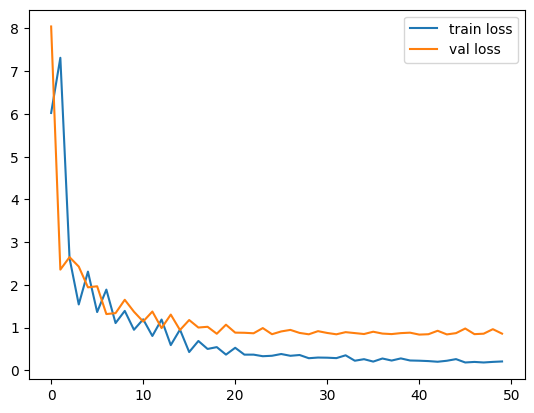

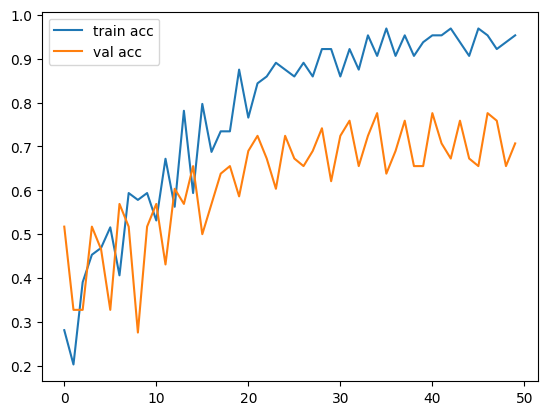

<Figure size 640x480 with 0 Axes>

In [57]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [58]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [59]:
y_pred = model.predict(test_set)

2/2 [==============================] - 18s 6s/step


In [60]:
y_pred

array([[3.24918255e-02, 5.20190038e-03, 9.62306321e-01],
       [1.52858393e-02, 7.89818227e-01, 1.94895938e-01],
       [3.98918204e-02, 6.95495546e-01, 2.64612615e-01],
       [4.05096635e-02, 7.60819852e-01, 1.98670551e-01],
       [1.68789439e-02, 2.39435673e-01, 7.43685365e-01],
       [3.23284268e-02, 6.95065036e-03, 9.60720956e-01],
       [9.22094285e-01, 4.66063023e-02, 3.12993117e-02],
       [1.04836136e-01, 1.09401243e-02, 8.84223759e-01],
       [1.45140722e-01, 5.03232539e-01, 3.51626664e-01],
       [3.53220329e-02, 2.39497557e-01, 7.25180447e-01],
       [2.89523043e-02, 9.34006453e-01, 3.70411836e-02],
       [7.06395805e-02, 1.84095725e-02, 9.10950899e-01],
       [3.79169956e-02, 4.61869210e-01, 5.00213802e-01],
       [2.66268253e-02, 6.14551723e-01, 3.58821422e-01],
       [2.43367270e-01, 4.39194500e-01, 3.17438155e-01],
       [4.32022214e-02, 3.05234224e-01, 6.51563585e-01],
       [2.65928090e-01, 6.96956217e-01, 3.71157452e-02],
       [7.50171393e-02, 4.90365

In [61]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [62]:
y_pred

array([2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 2,
       1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1,
       0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1], dtype=int64)

In [63]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [64]:
model=load_model('model_resnet50.h5')

In [83]:
img=image.load_img('Datasets/Test/audi/21.jpg',target_size=(224,224))

In [84]:
x=image.img_to_array(img)
x

array([[[190.,  59.,  65.],
        [181.,  55.,  59.],
        [173.,  50.,  53.],
        ...,
        [129., 139., 141.],
        [191., 201., 203.],
        [156., 166., 168.]],

       [[160.,  37.,  40.],
        [156.,  37.,  39.],
        [152.,  38.,  38.],
        ...,
        [124., 134., 136.],
        [122., 132., 134.],
        [ 78.,  88.,  90.]],

       [[160.,  37.,  40.],
        [156.,  37.,  39.],
        [152.,  38.,  38.],
        ...,
        [124., 134., 136.],
        [122., 132., 134.],
        [ 78.,  88.,  90.]],

       ...,

       [[ 89., 100., 102.],
        [ 85.,  96.,  98.],
        [ 75.,  86.,  88.],
        ...,
        [ 92.,  95., 100.],
        [ 78.,  83.,  87.],
        [112., 117., 121.]],

       [[ 89., 100., 102.],
        [ 85.,  96.,  98.],
        [ 75.,  86.,  88.],
        ...,
        [ 92.,  95., 100.],
        [ 78.,  83.,  87.],
        [112., 117., 121.]],

       [[ 89., 101., 101.],
        [ 85.,  97.,  97.],
        [ 75.,  

In [85]:
x.shape

(224, 224, 3)

In [86]:
x=x/255

In [87]:
x

array([[[0.74509805, 0.23137255, 0.25490198],
        [0.70980394, 0.21568628, 0.23137255],
        [0.6784314 , 0.19607843, 0.20784314],
        ...,
        [0.5058824 , 0.54509807, 0.5529412 ],
        [0.7490196 , 0.7882353 , 0.79607844],
        [0.6117647 , 0.6509804 , 0.65882355]],

       [[0.627451  , 0.14509805, 0.15686275],
        [0.6117647 , 0.14509805, 0.15294118],
        [0.59607846, 0.14901961, 0.14901961],
        ...,
        [0.4862745 , 0.5254902 , 0.53333336],
        [0.47843137, 0.5176471 , 0.5254902 ],
        [0.30588236, 0.34509805, 0.3529412 ]],

       [[0.627451  , 0.14509805, 0.15686275],
        [0.6117647 , 0.14509805, 0.15294118],
        [0.59607846, 0.14901961, 0.14901961],
        ...,
        [0.4862745 , 0.5254902 , 0.53333336],
        [0.47843137, 0.5176471 , 0.5254902 ],
        [0.30588236, 0.34509805, 0.3529412 ]],

       ...,

       [[0.34901962, 0.39215687, 0.4       ],
        [0.33333334, 0.3764706 , 0.38431373],
        [0.29411766, 0

In [88]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [89]:
model.predict(img_data)

1/1 [==============================] - 0s 343ms/step


array([[0.0039782 , 0.00589763, 0.99012417]], dtype=float32)

In [90]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 295ms/step


In [93]:
a==2


array([ True])